# Test 2 - Question 2
## Student: Luis Vasquez Espinoza

Q: *Simple linear regression and transformation*

Consider the data below on colon cancer mortality in different age groups (given as interval midpoints).The mortality is in parts per million per year.

* **age:**       22.5,  27.5,  32.5,  37.5,  42.5,  47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5
* **mortality:** 0.58,  1.42,  3.41,  6.63,  13.0,  24.9,  45.7,  82.2,  128 ,  187 ,  283 ,  369 ,  462

Investigate whether the data can be described by a regression of

* a) $y$ on $x$
* b) $ln(y)$ on $x$
* c) $ln(y)$ on $ln(x)$

Where $y$ = mortality and $x$= age.
Estimate the parameters in the best model.Write down the equation for predicting y from x. Compute prediction intervals for (some of)the age values in the data, and compare with prediction intervals from the second best model.
___

In [187]:
import pandas as pd

In [188]:
# Loading the data
age = [22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5, 82.5]
mortality_ppm = [0.58, 1.42, 3.41, 6.63, 13.0, 24.9, 45.7, 82.2, 128 , 187 , 283 , 369 , 462]

cancer_mortality_data = pd.DataFrame({"age":age, 'mortality_ppm':mortality_ppm})
cancer_mortality_data

,age,mortality_ppm
0,22.5,0.58
1,27.5,1.42
2,32.5,3.41
3,37.5,6.63
4,42.5,13.00
5,47.5,24.90
6,52.5,45.70
7,57.5,82.20
8,62.5,128.00
9,67.5,187.00


In [189]:
# Creating dependencies between x and y as stated in the question
import math

cancer_mortality_data['ln_age'] = cancer_mortality_data['age'].apply(lambda x: math.log(x))
cancer_mortality_data['ln_mortality_ppm'] = cancer_mortality_data['mortality_ppm'].apply(lambda x: math.log(x))

cancer_mortality_data

,age,mortality_ppm,ln_age,ln_mortality_ppm
0,22.5,0.58,3.113515,-0.544727
1,27.5,1.42,3.314186,0.350657
2,32.5,3.41,3.481240,1.226712
3,37.5,6.63,3.624341,1.891605
4,42.5,13.00,3.749504,2.564949
5,47.5,24.90,3.860730,3.214868
6,52.5,45.70,3.960813,3.822098
7,57.5,82.20,4.051785,4.409155
8,62.5,128.00,4.135167,4.852030
9,67.5,187.00,4.212128,5.231109


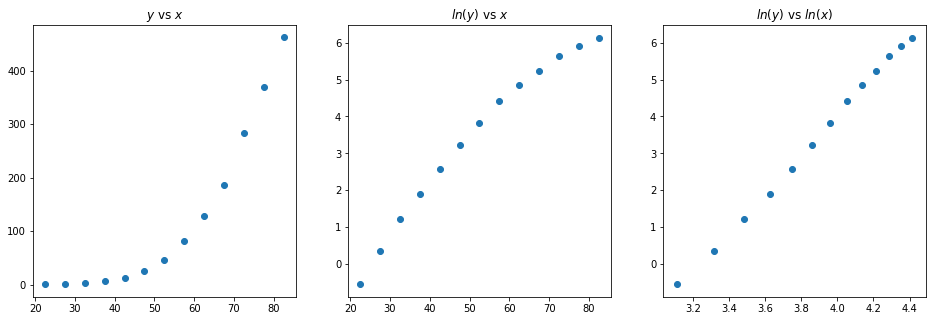

In [190]:
# Plotting the solicitated dependencies
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(16,5))

axs[0].scatter(cancer_mortality_data['age'], cancer_mortality_data['mortality_ppm'])# y on x
axs[0].set_title('$y$ vs $x$') 

axs[1].scatter(cancer_mortality_data['age'], cancer_mortality_data['ln_mortality_ppm']) # ln(y) on x
axs[1].set_title('$ln(y)$ vs $x$') 

axs[2].scatter(cancer_mortality_data['ln_age'], cancer_mortality_data['ln_mortality_ppm']) # ln(y) on ln(x)
axs[2].set_title('$ln(y)$ vs $ln(x)$') 

plt.show()

Clearly, the dependency that shows a better linear adjustment is the last one ($lny$ vs $lnx$). Evenso, let's apply a LinearRegression model on all three of them.

In [191]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error

x = cancer_mortality_data['age'].to_numpy().reshape(-1,1)
y = cancer_mortality_data['mortality_ppm'].to_numpy().reshape(-1,1)
ln_x = cancer_mortality_data['ln_age'].to_numpy().reshape(-1,1)
ln_y = cancer_mortality_data['ln_mortality_ppm'].to_numpy().reshape(-1,1)

Fitting eq: y = 7.201307692307691.x + -254.46557692307684
R^2: 0.8077176888851028
MAE: 62.69653846153847


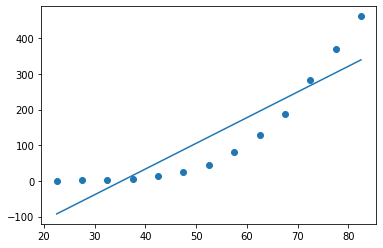

In [192]:
# Calculating, measuring and plotting "y vs x"

lr_1 = LinearRegression()
lr_1.fit(x, y)

print("Fitting eq: y = {}.x + {}".format(lr_1.coef_[0,0], lr_1.intercept_[0]))
print("R^2: {}".format(lr_1.score(x, y)))
print("MAE: {}".format(median_absolute_error(y, lr_1.predict(x))))

plt.scatter(x,y)
plt.plot(x,lr_1.predict(x))

Fitting eq: ln(y) = 0.11136741806169952.x + -2.4075383046931558
R^2: 0.9720200804564302
MAE: 0.3044088203904118


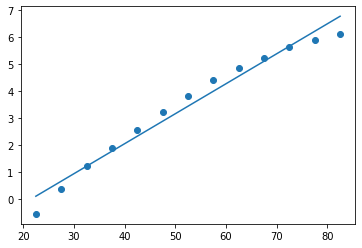

In [193]:
# Calculating, measuring and plotting "ln(y) vs x"

lr_2 = LinearRegression()
lr_2.fit(x, ln_y)

print("Fitting eq: ln(y) = {}.x + {}".format(lr_2.coef_[0,0], lr_2.intercept_[0]))
print("R^2: {}".format(lr_2.score(x, ln_y)))
print("MAE: {}".format(median_absolute_error(ln_y, lr_2.predict(x))))

plt.scatter(x,ln_y)
plt.plot(x,lr_2.predict(x))

Fitting eq: ln(y) = 5.34556181813055.ln(x) + -17.346789659504893
R^2: 0.998096203391949
MAE: 0.09403146609219437


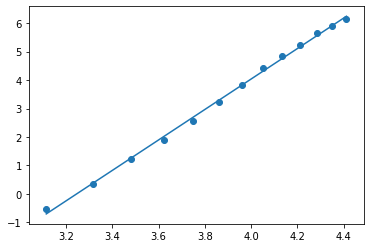

In [194]:
# Calculating, measuring and plotting "ln(y) vs ln(x)"

lr_3 = LinearRegression()
lr_3.fit(ln_x, ln_y)

print("Fitting eq: ln(y) = {}.ln(x) + {}".format(lr_3.coef_[0,0], lr_3.intercept_[0]))
print("R^2: {}".format(lr_3.score(ln_x, ln_y)))
print("MAE: {}".format(median_absolute_error(ln_y, lr_3.predict(ln_x))))

plt.scatter(ln_x,ln_y)
plt.plot(ln_x,lr_3.predict(ln_x))

All three of the models got a decent r-square value
* $0.807$ for $x$ vs $y$
* $0.972$ for $x$ vs $ln(y)$
* $0.998$ for $ln(x)$ vs $ln(y)$)

But what really gives a relation between the third and obviously best model and a metric is the Median Absolute Error metric.

* $62.69$ for $x$ vs $y$
* $0.304$ for $x$ vs $ln(y)$
* $0.09$ for $ln(x)$ vs $ln(y)$

Finally, we can say that this last one is the best model for fitting the cancer mortaly vs age data, because it has the lowest median error over the adjusted data.

The final equation goes as follows:

> $ln(mortality) = -17.34 + 5.345*ln(age)$

or

> $mortality = e^{-17.34} * age^{5.345}$

Now, I dont think that the theory behind prediction intervals was covered in class, but I could be wrong. I checked some references on what was and how would I calculate it over a fitted model. Using [this material](https://machinelearningmastery.com/prediction-intervals-for-machine-learning/) as reference, I will compute 3 prediction intervals over some data.

In [195]:
def get_prediction_interval(y, y_predicted, std_coef=1.96):
    sum_errs = np.sum((y - y_predicted)**2)
    standar_dev = np.sqrt(1/(len(y)-2) * sum_errs)
    interval = standar_dev*std_coef
    return interval

In [196]:
# Some datapoints for testing prediction intervals
pred_interval_data = cancer_mortality_data.sample(3, random_state=12321)
pred_interval_data

,age,mortality_ppm,ln_age,ln_mortality_ppm
11,77.5,369.00,4.350278,5.910797
2,32.5,3.41,3.481240,1.226712
10,72.5,283.00,4.283587,5.645447


In [197]:
# Best and second best models
x_test = pred_interval_data['age'].to_numpy().reshape(-1, 1)
lnx_test = pred_interval_data['ln_age'].to_numpy().reshape(-1, 1)
lny_test = pred_interval_data['ln_mortality_ppm'].to_numpy().reshape(-1, 1)

In [198]:
y3_predictions_list = lr_3.predict(lnx_test)
y2_predictions_list = lr_2.predict(x_test)

In [199]:
y3_pred_interval = [get_prediction_interval(lny_test, y3_pred) for y3_pred in y3_predictions_list]
y2_pred_interval = [get_prediction_interval(lny_test, y2_pred) for y2_pred in y2_predictions_list]

In [200]:
for y3_int, y2_int in zip(y3_pred_interval, y2_pred_interval):
    print("best model pred. interval: {} | second best pred. interval: {} \n >>Diff:{}\n".format(y3_int, y2_int, y3_int-y2_int))

best model pred. interval: 9.189517915127544 | second best pred. interval: 9.877907965030193 
 >>Diff:-0.6883900499026492

best model pred. interval: 12.522554132966025 | second best pred. interval: 12.662288145785189 
 >>Diff:-0.1397340128191633

best model pred. interval: 8.507581957340156 | second best pred. interval: 8.715430015683818 
 >>Diff:-0.2078480583436626



**Is shown that the intervals that describes confidence for the best model are narrower than the second best's, wich gives a smaller error amplitude and thus, more confidence.**

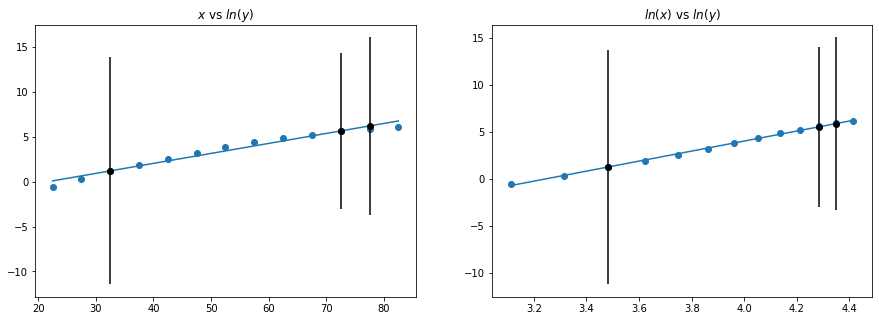

In [201]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Second best model (left)
axs[0].scatter(x, ln_y)
axs[0].plot(x, lr_2.predict(x))
axs[0].set_title('$x$ vs $ln(y)$')
axs[0].errorbar(x_test, y2_predictions_list, yerr=y2_pred_interval, color='black', fmt='o')


# Best model (right)
axs[1].scatter(ln_x, ln_y)
axs[1].plot(ln_x, lr_3.predict(ln_x))
axs[1].set_title('$ln(x)$ vs $ln(y)$')
axs[1].errorbar(lnx_test, y3_predictions_list, yerr=y3_pred_interval, color='black', fmt='o')

plt.show()